# Statistical Data Analysis

---

## Preface

This notebook is for designing and executing a complete statistical data analysis pipeline. This is framed as a hypothetical scenario in order to give the analysis some context and flavour.

---

## Preface

The survey data of living habits of individual persons and households is used for analysis. Goal is to analyse which activities people spend their time on and whether there are differences between groups.

The files `habits.data` and `habits.txt` contain the data and its documentation, respectively. Given that the complete data set is huge, one needs to focus on specific parts of the data. Only these variables are used in analysis:

* kohde
* jasen
* pvknro
* sp
* IKAL1
* ASALUE
* V1
* V21
* V22
* V5
* H1a_A
* H1b_A

1. Characterise the individuals that are present in the data. Are there groups of similar persons?
2. Estimate how much time on average households spend daily on each activity.
3. With respect to which activities do men and women differ?
4. With respect to which activities do living environments differ?
5. Which activities are associated with each other?

---

# Analysis code and report

Part 0: Data preparation

Part 1: Characterise the individuals that are present in the data. Are there groups of similar persons? (Clustering)

Part 2: Estimate how much time on average households spend daily on each activity. (Estimation)

Part 3: With respect to which activities do men and women differ? (Statistical comparison with two variables)

Part 4: With respect to which activities do living environments differ? (Statistical comparison with multiple variables)

Part 5: Which activities are associated with each other? (Correlation)

---

## Part 0

Filter variables so that only wanted variables are analyzed.

In [57]:
import pandas as pd
import numpy as np 

columns = ['kohde', 'jasen', 'pvknro', 'sp', 'IKAL1', 'ASALUE', 'V1', 'V21', 'V22', 'V5', 'H1a_A', 'H1b_A']
habits = pd.read_csv(r'habits.data', sep=";", usecols=columns, header=0)
habits

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,V1,V5,V21,V22,H1a_A,H1b_A
0,50007,2,2,2,3.0,6,580,0,0,0,1.0,1.0
1,50009,1,1,2,1.0,7,0,40,0,0,1.0,1.0
2,50015,1,1,1,3.0,8,0,10,0,0,2.0,1.0
3,50032,2,1,1,2.0,8,0,0,0,0,2.0,2.0
4,50033,1,1,2,1.0,8,00:00,02:10,00:00,00:00,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,2,2,1.0,4,440,30,0,0,1.0,1.0
389,51947,2,1,2,1.0,7,490,0,0,0,1.0,1.0
390,51956,1,1,2,2.0,6,0,30,0,0,1.0,1.0
391,51957,2,2,2,1.0,7,0,10,0,0,2.0,2.0


Check data types and null values.

In [58]:
print(habits.dtypes)
print('')
print(habits.isnull().sum())

kohde      int64
jasen      int64
pvknro     int64
sp         int64
ASALUE    object
IKAL1      int64
V1        object
V5        object
V21       object
V22       object
H1a_A     object
H1b_A     object
dtype: object

kohde     0
jasen     0
pvknro    0
sp        0
ASALUE    0
IKAL1     0
V1        0
V5        0
V21       0
V22       0
H1a_A     0
H1b_A     0
dtype: int64


Data types of variables are either int64 or object. Variables with object type are converted later to avoid possible problems. No variables with null values.

Check oddities in variables jasen, pvknro, sp, ASALUE, IKAL_1, H1a_A, and H1b_A.

In [59]:
print("jasen:",np.sort(habits['jasen'].unique()), '\n')
print("pvknro:",np.sort(habits['pvknro'].unique()), '\n')
print("sp:",np.sort(habits['sp'].unique()), '\n')
print("ASALUE:",np.sort(habits['ASALUE'].unique()), '\n')
print("IKAL1:",np.sort(habits['IKAL1'].unique()), '\n')
print("H1a_A:",np.sort(habits['H1a_A'].unique()), '\n')
print("H1b_A:",np.sort(habits['H1b_A'].unique()), '\n')

jasen: [1 2] 

pvknro: [1 2] 

sp: [1 2] 

ASALUE: ['1.0' '2.0' '3.0' '?'] 

IKAL1: [3 4 5 6 7 8 9] 

H1a_A: ['0.0' '1.0' '120.0' '180.0' '2.0' '60.0' '?'] 

H1b_A: ['0.0' '1.0' '120.0' '2.0' '60.0' '?'] 



There is some variables with '?' as value. Print the number of rows with '?', then remove these rows and test by printing again the number of rows with '?'

In [60]:
rows_with_question_mark = habits[habits.isin(['?']).any(axis=1)]
print(f"Total of {habits.isin(['?']).any(axis=1).sum()} rows with '?'\n")

Total of 41 rows with '?'



In [61]:
habits = habits[~habits.isin(['?']).any(axis=1)]
habits = habits.reset_index(drop=True)

rows_with_question_mark = habits[habits.isin(['?']).any(axis=1)]
print(f"Total of {habits.isin(['?']).any(axis=1).sum()} rows with '?'\n")

Total of 0 rows with '?'



Check oddities in variables V1, V5, V21, and V22.

In [62]:
print("V1:",np.sort(habits['V1'].unique()), '\n')
print("V5:",np.sort(habits['V5'].unique()), '\n')
print("V21:",np.sort(habits['V21'].unique()), '\n')
print("V22:",np.sort(habits['V22'].unique()), '\n')

V1: ['0' '00:00' '02:00' '04:20' '04:30' '06:00' '06:50' '07:00' '07:40'
 '07:50' '08:00' '08:10' '08:30' '10' '10:00' '140' '160' '180' '210'
 '230' '240' '260' '280' '290' '30' '300' '310' '320' '330' '340' '360'
 '370' '380' '390' '40' '400' '410' '420' '430' '440' '450' '460' '470'
 '480' '490' '50' '500' '510' '520' '540' '550' '580' '590' '600' '620'
 '630' '640' '650' '660' '670' '720' '750' '790' '830'] 

V5: ['0' '00:00' '00:10' '00:20' '00:30' '00:40' '00:50' '01:00' '01:10'
 '01:30' '01:40' '02:10' '06:00' '10' '100' '110' '120' '130' '140' '150'
 '160' '170' '180' '20' '240' '30' '40' '50' '60' '70' '80' '90'] 

V21: ['0' '00:00' '00:20' '03:40' '10' '100' '110' '130' '140' '150' '160'
 '190' '20' '200' '220' '30' '350' '40' '50' '60' '70' '90'] 

V22: ['0' '00:00' '00:20' '10' '100' '110' '120' '140' '160' '170' '20' '30'
 '40' '50' '60' '80'] 



There is some variables with ':' as value. Remove rows with ':' in variables V1, V5, V21, and V22 an test by printing again unique values of these variables.

In [63]:
habits = habits[~habits['V1'].str.contains(':')]
habits = habits[~habits['V5'].str.contains(':')]
habits = habits[~habits['V21'].str.contains(':')]
habits = habits[~habits['V22'].str.contains(':')]

print("V1:",np.sort(habits['V1'].unique()), '\n')
print("V5:",np.sort(habits['V5'].unique()), '\n')
print("V21:",np.sort(habits['V21'].unique()), '\n')
print("V22:",np.sort(habits['V22'].unique()), '\n')

V1: ['0' '10' '140' '160' '180' '210' '230' '240' '260' '280' '290' '30' '300'
 '310' '320' '330' '340' '360' '370' '380' '390' '40' '400' '410' '420'
 '430' '440' '450' '460' '470' '480' '490' '50' '500' '510' '520' '540'
 '550' '580' '590' '600' '620' '630' '640' '650' '660' '670' '720' '750'
 '790' '830'] 

V5: ['0' '10' '100' '110' '120' '130' '140' '150' '160' '170' '180' '20' '240'
 '30' '40' '50' '60' '70' '80' '90'] 

V21: ['0' '10' '100' '110' '130' '140' '150' '160' '190' '20' '200' '220' '30'
 '350' '40' '50' '60' '70' '90'] 

V22: ['0' '10' '100' '110' '120' '140' '160' '170' '20' '30' '40' '50' '60'
 '80'] 



Convert variables ASALUE, V1, V5, V21, V22, H1a_A, and H1b_A to numeric and print the ready, cleaned dataframe.

In [64]:
habits['ASALUE'] = pd.to_numeric(habits['ASALUE'])
habits['V1'] = pd.to_numeric(habits['V1'])
habits['V5'] = pd.to_numeric(habits['V5'])
habits['V21'] = pd.to_numeric(habits['V21'])
habits['V22'] = pd.to_numeric(habits['V22'])
habits['H1a_A'] = pd.to_numeric(habits['H1a_A'])
habits['H1b_A'] = pd.to_numeric(habits['H1b_A'])

habits

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,V1,V5,V21,V22,H1a_A,H1b_A
0,50007,2,2,2,3.0,6,580,0,0,0,1.0,1.0
1,50009,1,1,2,1.0,7,0,40,0,0,1.0,1.0
2,50015,1,1,1,3.0,8,0,10,0,0,2.0,1.0
3,50032,2,1,1,2.0,8,0,0,0,0,2.0,2.0
6,50045,1,1,2,3.0,6,0,50,0,0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
347,51943,1,2,2,1.0,4,440,30,0,0,1.0,1.0
348,51947,2,1,2,1.0,7,490,0,0,0,1.0,1.0
349,51956,1,1,2,2.0,6,0,30,0,0,1.0,1.0
350,51957,2,2,2,1.0,7,0,10,0,0,2.0,2.0


Print also the description of variables, histograms of variables V1, V5, V21, and V22, and density plots of variables V1, V5, V21, and V22.


In [65]:
habits.describe()

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,V1,V5,V21,V22,H1a_A,H1b_A
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,50956.245098,1.392157,1.535948,1.549020,1.627451,6.222222,129.444444,36.111111,10.130719,5.065359,3.088235,2.078431
std,560.169877,0.489031,0.499523,0.498406,0.832790,1.515914,217.906624,37.672977,37.240678,21.135681,14.335170,7.563094
min,50007.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50492.500000,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,10.000000,0.000000,0.000000,1.000000,1.000000
50%,50929.000000,1.000000,2.000000,2.000000,1.000000,6.000000,0.000000,30.000000,0.000000,0.000000,2.000000,2.000000
75%,51445.500000,2.000000,2.000000,2.000000,2.000000,7.000000,287.500000,60.000000,0.000000,0.000000,2.000000,2.000000
max,51964.000000,2.000000,2.000000,2.000000,3.000000,9.000000,830.000000,240.000000,350.000000,170.000000,180.000000,120.000000


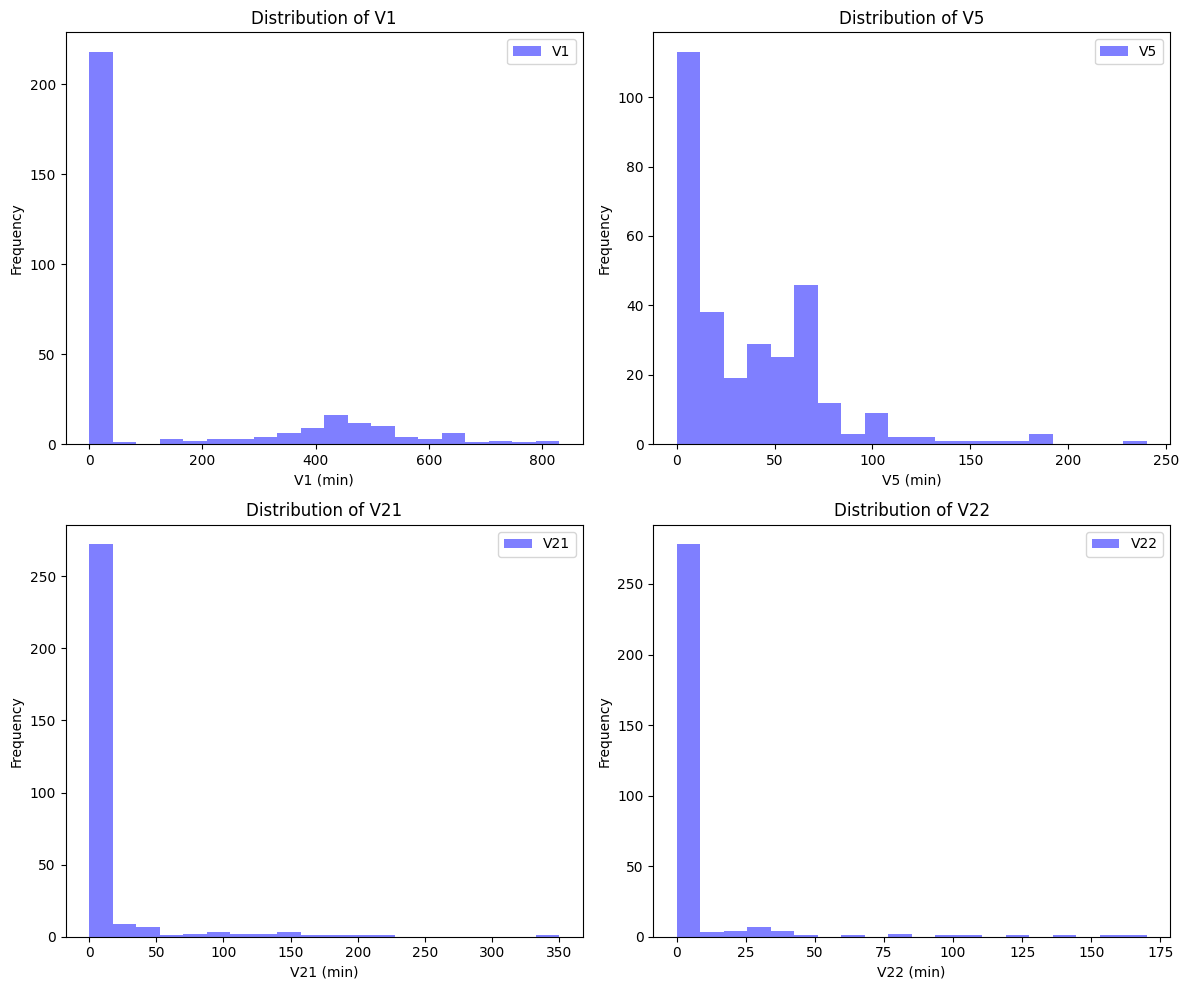

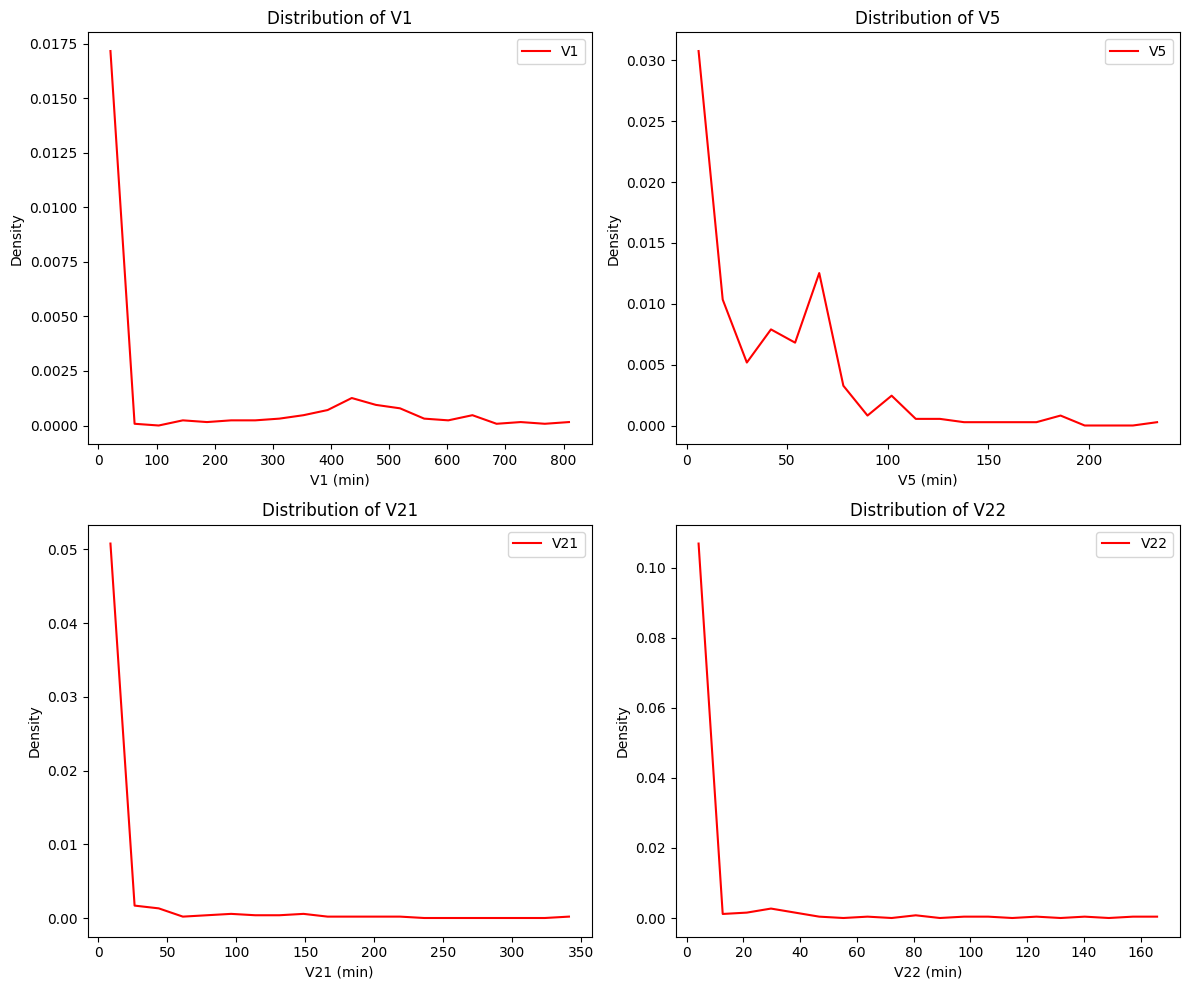

In [85]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

variable_labels = ['V1 (min)', 'V5 (min)', 'V21 (min)', 'V22 (min)']

for i, var in enumerate(['V1', 'V5', 'V21', 'V22']):
    
    axes[i].hist(habits[var], bins=20, alpha=0.5, color='b', label=var)
    
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(variable_labels[i])
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(['V1', 'V5', 'V21', 'V22']):

    density, bins = np.histogram(habits[var], bins=20, density=True)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    axes[i].plot(bin_centers, density, 'r-', label=var)
    
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(variable_labels[i])
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

Conclusions about distribution shapes: All are ver right-skewed and long-tailed. V1, V21, and V22 are unimodal since there is only one peak. V5 is bimodal since the distribution has two peaks.

---

## Part 1

Perform hierarchical clustering with cleaned data and print the dendogram to characterise individual households.

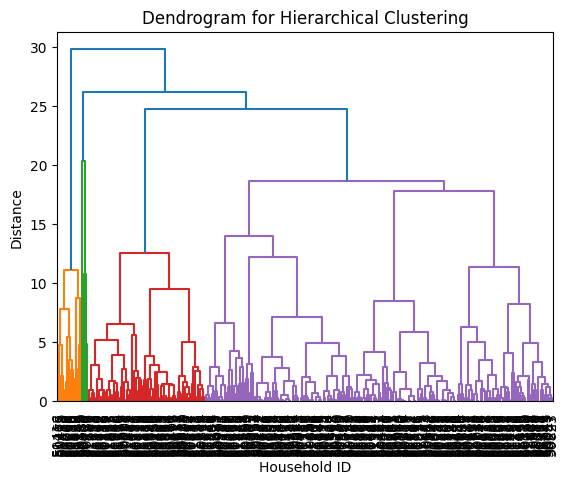

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = habits

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['sp', 'ASALUE', 'IKAL1', 'V1', 'V5', 'V21', 'V22', 'H1a_A', 'H1b_A']])

Z = linkage(X_scaled, method='ward')

plt.title("Dendrogram for Hierarchical Clustering")
dendrogram(Z, labels=df['kohde'].values, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Household ID')
plt.ylabel('Distance')
plt.show()

Based on dendogram, housholdes are separated to four clusters. Distance represents the dissimilarity between nodes in dendogram.

Add these 4 clusters to dataframe and print to which cluster each 'kohde' belongs. Print also number of values in a cluster and summarization of variables for each cluster by median and mean.

In [68]:
clusters = fcluster(Z, 4, criterion='maxclust')
df['Cluster'] = clusters
df[['kohde', 'Cluster']]

,kohde,Cluster
0,50007,3
1,50009,4
2,50015,4
3,50032,4
6,50045,4
...,...,...
347,51943,3
348,51947,3
349,51956,4
350,51957,4


In [69]:
df['Cluster'].value_counts()

Cluster
4    215
3     72
1     15
2      4
Name: count, dtype: int64

In [70]:
df.groupby('Cluster')[['jasen', 'pvknro', 'sp', 'IKAL1', 'ASALUE', 'V1', 'V21', 'V22', 'V5', 'H1a_A', 'H1b_A']].median()

,jasen,pvknro,sp,IKAL1,ASALUE,V1,V21,V22,V5,H1a_A,H1b_A
Cluster,,,,,,,,,,,
1,1.0,1.0,2.0,4.0,1.0,0.0,140.0,80.0,20.0,2.0,2.0
2,1.5,1.5,1.0,7.5,1.0,145.0,0.0,0.0,5.0,120.0,30.0
3,1.0,2.0,1.0,6.0,1.0,465.0,0.0,0.0,10.0,2.0,2.0
4,1.0,2.0,2.0,7.0,1.0,0.0,0.0,0.0,40.0,2.0,2.0


In [71]:
df.groupby('Cluster')[['jasen', 'pvknro', 'sp', 'IKAL1', 'ASALUE', 'V1', 'V21', 'V22', 'V5', 'H1a_A', 'H1b_A']].mean()

,jasen,pvknro,sp,IKAL1,ASALUE,V1,V21,V22,V5,H1a_A,H1b_A
Cluster,,,,,,,,,,,
1,1.333333,1.200000,1.600000,4.400000,1.733333,66.000000,148.666667,80.000000,33.333333,1.533333,1.733333
2,1.500000,1.500000,1.250000,7.750000,1.250000,187.500000,0.000000,0.000000,40.000000,105.000000,45.000000
3,1.333333,1.611111,1.472222,5.583333,1.763889,486.805556,6.388889,0.694444,17.638889,2.375000,1.486111
4,1.413953,1.534884,1.576744,6.534884,1.581395,13.116279,1.906977,1.395349,42.418605,1.539535,1.502326


Make a 2D PCA visualization of clusters.

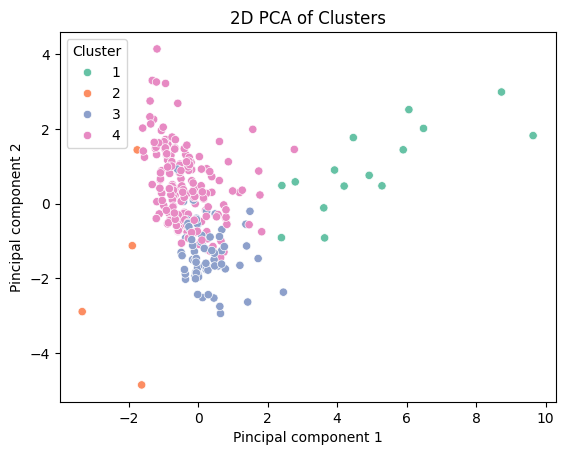

In [72]:
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('2D PCA of Clusters')
plt.xlabel('Pincipal component 1')
plt.ylabel('Pincipal component 2')
plt.show()

Principal component 1 represents the direction of maximum variation through the data. Principal component 2 represents the next highest direction of maximum variation through the data. Pincipal component 1 is orthogonal to Pincipal component 2.

In conclusion, there are four groups of similar persons on data. Cluster 4 has the most values and cluster 2 only a few. 2D PCA representation of clusters show that the four groups can be indeed separated.

---

## Part 2

Estimate mean values of activities with the formula $\frac{1}{n} \sum_{i=1}^{n} x_i$, where $x$ is activity and $n$ is number of rows. 

In [73]:
sum_of_V1 = habits['V1'].sum()
sum_of_V5 = habits['V5'].sum()
sum_of_V21 = habits['V21'].sum()
sum_of_V22 = habits['V22'].sum()

number_of_rows = len(habits)

avg_work = round(sum_of_V1 / number_of_rows)
avg_cooking = round(sum_of_V5 / number_of_rows)
avg_childcare = round(sum_of_V21 / number_of_rows)
avg_reading = round(sum_of_V22 / number_of_rows)

print("Estimation of how much time average households spend daily on working:", avg_work, "min")
print("Estimation of how much time average households spend daily on cooking:", avg_cooking, "min")
print("Estimation of how much time average households spend daily on childcare:", avg_childcare, "min")
print("Estimation of how much time average households spend daily on reading and playing with children:", avg_reading, "min")

Estimation of how much time average households spend daily on working: 129 min
Estimation of how much time average households spend daily on cooking: 36 min
Estimation of how much time average households spend daily on childcare: 10 min
Estimation of how much time average households spend daily on reading and playing with children: 5 min


In conclusion, average households spend daily 129 minutes on working, 36 minutes on cooking, 10 minutes on childcare, and 5 minutes on reading and playing with children.

---

## Part 3

Phases of statistical test in general:

1) Statistical model
2) Null hypothesis $H_0$
3) Alternative hypothesis $H_A$
5) Significance level
6) Conclusions

There are two variables to compare: men and women. These variables have activities V1, V5, V21, and V22 as values. Test normality of values with Shapiro-Wilk test.

In [74]:
import pandas as pd
from scipy import stats

men = habits[habits['sp'] == 1]
women = habits[habits['sp'] == 2]

activities = ['V1', 'V5', 'V21', 'V22']

for activity in activities:
    print(f"Testing normality for {activity}:")

    stat, p_value_men = stats.shapiro(men[activity])
    print(f"Men: p-value = {p_value_men}")
    if p_value_men > 0.05:
        print(f"The distribution of {activity} for men is normal.\n")
    else:
        print(f"The distribution of {activity} for men is not normal.\n")

    stat, p_value_women = stats.shapiro(women[activity])
    print(f"Women: p-value = {p_value_women}")
    if p_value_women > 0.05:
        print(f"The distribution of {activity} for women is normal.\n")
    else:
        print(f"The distribution of {activity} for women is not normal.\n")

Testing normality for V1:
Men: p-value = 2.2368995555720564e-16
The distribution of V1 for men is not normal.

Women: p-value = 1.9804918625213533e-19
The distribution of V1 for women is not normal.

Testing normality for V5:
Men: p-value = 1.3599047309803253e-11
The distribution of V5 for men is not normal.

Women: p-value = 6.374804125687374e-11
The distribution of V5 for women is not normal.

Testing normality for V21:
Men: p-value = 1.726816180010236e-22
The distribution of V21 for men is not normal.

Women: p-value = 9.023070159785688e-25
The distribution of V21 for women is not normal.

Testing normality for V22:
Men: p-value = 1.704882356565862e-24
The distribution of V22 for men is not normal.

Women: p-value = 1.060438055729879e-24
The distribution of V22 for women is not normal.



The p-value is always < 0.05 so distributions are not normal.

Since doing statistical comparison with two variables, that are numerical, not normal, and unpaired, let's use Mann-Whitney U Test.

1) Mann-Whitney U Test
2) $H_0$ = men and women don't differ on activities. (Two-sided test)
3) $H_A$ = men and women do differ on activities.

In [75]:
p_values = {}

for activity in activities:
    stat, p = stats.mannwhitneyu(men[activity], women[activity], alternative='two-sided')
    p_values[activity] = p

for activity, p in p_values.items():
    if p < 0.05:
        print(f"Significant difference in {activity}: p = {p}")
    else:
        print(f"No significant difference in {activity}: p = {p}")

No significant difference in V1: p = 0.3868755055368064
Significant difference in V5: p = 5.794877421747226e-08
No significant difference in V21: p = 0.56312258068803
No significant difference in V22: p = 0.06140838349762477


4) The p-value is below the significance level 0.05 only in activity V5.
5) Low p-value indicates evidence against the null hypothesis. This means that activity V5, cooking, is the only activity wehere men and women might differ.

Print mean of each activity grouped by sex to support results of Mann-Whitney U Test.

In [76]:
activity_summary = habits.groupby('sp').agg({
    'V1': 'mean',
    'V5': 'mean',
    'V21': 'mean',
    'V22': 'mean',
}).reset_index()

activity_summary.columns = ['sp', 'mean_working', 'mean_cooking', 'mean_childcare', 'mean_reading_playing']

activity_summary

,sp,mean_working,mean_cooking,mean_childcare,mean_reading_playing
0,1,148.188406,23.768116,7.391304,2.753623
1,2,114.047619,46.250000,12.380952,6.964286


Means of activities grouped by sex show that indeed the activity V5 is the only one with significant difference.

In conclusion, men and women differ significantly on cooking activity.

---

## Part 4

There are three variables to compare: city, municipality, and rural area. These variables have activities V1, V5, V21, and V22 as values. Test normality of values with Shapiro-Wilk test.

In [77]:
import pandas as pd
from scipy import stats

city = habits[habits['ASALUE'] == 1]
municipality = habits[habits['ASALUE'] == 2]
rural_area = habits[habits['ASALUE'] == 3]

activities = ['V1', 'V5', 'V21', 'V22']

for activity in activities:

    stat, p_value_city = stats.shapiro(city[activity])
    print(f"City: p-value = {p_value_city}")
    if p_value_city > 0.05:
        print(f"The distribution of {activity} for city is normal.\n")
    else:
        print(f"The distribution of {activity} for city is not normal.")

    stat, p_value_municipality = stats.shapiro(municipality[activity])
    print(f"Municipality: p-value = {p_value_municipality}")
    if p_value_municipality > 0.05:
        print(f"The distribution of {activity} for municipality is normal.\n")
    else:
        print(f"The distribution of {activity} for municipality is not normal.")

    stat, p_value_rural_area = stats.shapiro(rural_area[activity])
    print(f"Municipality: p-value = {p_value_rural_area}")
    if p_value_rural_area > 0.05:
        print(f"The distribution of {activity} for rural area is normal.\n")
    else:
        print(f"The distribution of {activity} for rural area is not normal.")

City: p-value = 1.84212059932848e-20
The distribution of V1 for city is not normal.
Municipality: p-value = 1.9244269287902437e-09
The distribution of V1 for municipality is not normal.
Municipality: p-value = 4.692646597902332e-11
The distribution of V1 for rural area is not normal.
City: p-value = 6.339314323004901e-12
The distribution of V5 for city is not normal.
Municipality: p-value = 4.352171036662889e-07
The distribution of V5 for municipality is not normal.
Municipality: p-value = 7.655567025099008e-07
The distribution of V5 for rural area is not normal.
City: p-value = 1.1222270876328927e-26
The distribution of V21 for city is not normal.
Municipality: p-value = 4.454158926971906e-14
The distribution of V21 for municipality is not normal.
Municipality: p-value = 1.844835270381801e-15
The distribution of V21 for rural area is not normal.
City: p-value = 2.596689308293925e-26
The distribution of V22 for city is not normal.
Municipality: p-value = 6.493398624519754e-15
The distr

The p-value is always < 0.05 so distributions are not normal.

Since doing statistical comparison with three variables, that are numerical and not normal, let's use Kruskal-Wallis Test.

1) Kruskal-Wallis Test
2) $H_0$ = city, municipality, and rural area dont'differ on activities.
3) $H_A$ = city, municipality, and rural area do differ on activities.

In [78]:
kruskal_p_values = {}

for activity in activities:
    stat, p = stats.kruskal(city[activity], municipality[activity], rural_area[activity])
    kruskal_p_values[activity] = p

for activity, p in kruskal_p_values.items():
    if p < 0.05:
        print(f"Significant difference in {activity} across living environments: p = {p}")
    else:
        print(f"No significant difference in {activity} across living environments: p = {p}")

No significant difference in V1 across living environments: p = 0.5510055698026708
No significant difference in V5 across living environments: p = 0.48815164592391214
No significant difference in V21 across living environments: p = 0.59756177784718
No significant difference in V22 across living environments: p = 0.6871769472367052


4) The p-value is not below the significance level 0.05 in any activity.
5) This means that living enviroments don't differ significantly when it comes to activities.

Print mean of each activity grouped by the living environment to support Kruskal-Wallis Test.

In [79]:
activity_summary = habits.groupby('ASALUE').agg({
    'V1': 'mean',
    'V5': 'mean',
    'V21': 'mean',
    'V22': 'mean',
}).reset_index()

activity_summary.columns = ['ASALUE', 'mean_working', 'mean_cooking', 'mean_childcare', 'mean_reading_playing']

activity_summary

,ASALUE,mean_working,mean_cooking,mean_childcare,mean_reading_playing
0,1.0,122.500000,33.206522,8.097826,5.271739
1,2.0,136.346154,40.961538,13.269231,6.153846
2,3.0,142.571429,40.142857,13.142857,3.714286


Means of activities grouped by living envirometn show that activities don't have significant differences.

In conclusion, living enviroments don't differ on activities.

---

## Part 5

To know which activities are associated with each other, correlations between activity variables are needed. Since activities are numerical and not normal, let's use Spearman correlation.

Create correlation matrix and correlation graphs with Spearman correlation.

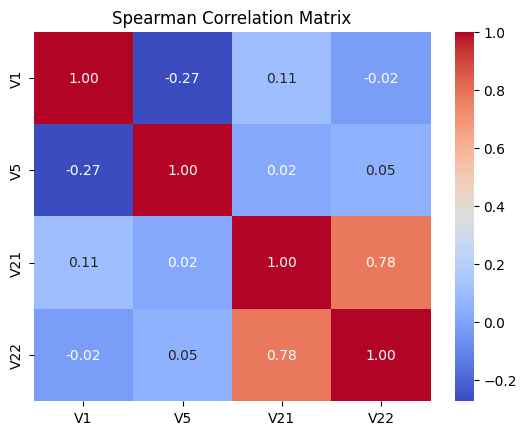

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

activity_columns = ['V1', 'V5', 'V21', 'V22']
activity_data = habits[activity_columns]

correlation_matrix, _ = spearmanr(activity_data, axis=0)

correlation_df = pd.DataFrame(correlation_matrix, index=activity_columns, columns=activity_columns)

sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix')
plt.show()

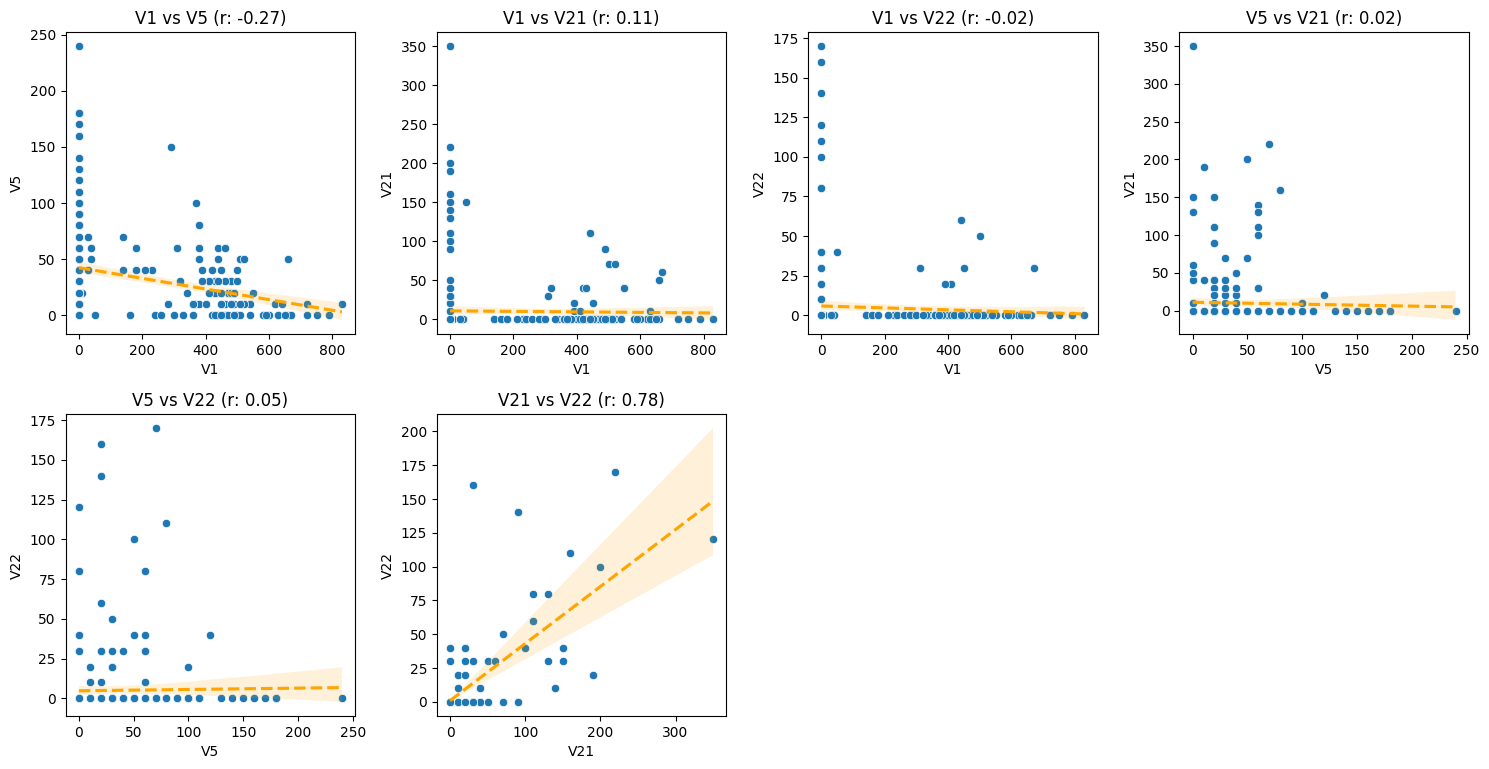

In [81]:
import itertools

plt.figure(figsize=(15, 15))

for i, (var1, var2) in enumerate(itertools.combinations(activity_columns, 2)):
    corr, _ = spearmanr(habits[var1], habits[var2])
    
    plt.subplot(len(activity_columns), len(activity_columns), i + 1)
    sns.scatterplot(x=habits[var1], y=habits[var2])
    
    sns.regplot(x=habits[var1], y=habits[var2], scatter=False, color='orange', line_kws={"linestyle":"--"})
    
    plt.title(f'{var1} vs {var2} (r: {corr:.2f})')
    plt.xlabel(var1)
    plt.ylabel(var2)

plt.tight_layout()
plt.show()

Correlation r is strongest between V21 and V22 with r = 0,78. Also There is slight negative correlation between V1 and V5 with r = -0,27. The rest of r values are close to zero so there are no significant correlations.

In conclusion, childcare, and reading and playing with children are associated with each other.

---